In [154]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

### 1. Выбрать подходящую таблицу данных. Построить и визуализировать дерево решений.

In [155]:
column_names = ['Gender','Age','Debt','Married','BankCustomer',
                'EducationLevel','Ethnicity','YearsEmployed',
                'PriorDefault','Employed','CreditScore','DriversLicense',
                'Citizen','ZipCode','Income','ApprovalStatus']

approval_class = ['approve','decline']
df = pd.read_csv('credit_card_approval.csv', header=0, names=column_names)

df = df.drop(columns=['PriorDefault'])
column_names = ['Gender','Age','Debt','Married','BankCustomer',
                'EducationLevel','Ethnicity','YearsEmployed',
                'Employed','CreditScore','DriversLicense',
                'Citizen','ZipCode','Income','ApprovalStatus']

In [156]:
# проанализируем датасет

In [157]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,0,f,g,00280,750,-


In [158]:
# for col in ['Gender','Married','BankCustomer',
#                 'EducationLevel','Ethnicity',
#                 'PriorDefault','Employed','DriversLicense',
#                 'Citizen','ZipCode','ApprovalStatus']:
for col in ['Gender','Married','BankCustomer',
                'EducationLevel','Ethnicity',
                'Employed','DriversLicense',
                'Citizen','ZipCode','ApprovalStatus']:
    df[col], _ = pd.factorize(df[col
                                ])
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna()

In [159]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000
mean,0.711965,31.569261,4.784682,0.261448,0.261448,6.010340,1.319055,2.210643,0.568685,2.437223,0.456425,0.104874,40.314623,1022.748892,0.550960
std,0.490793,11.966670,4.997552,0.478415,0.478415,3.949183,1.435540,3.353029,0.495626,4.900275,0.498466,0.343050,44.838269,5255.707623,0.497764
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.580000,1.000000,0.000000,0.000000,2.000000,1.000000,0.165000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
50%,1.000000,28.420000,2.750000,0.000000,0.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,15.000000,5.000000,1.000000
75%,1.000000,38.250000,7.500000,0.000000,0.000000,9.000000,1.000000,2.585000,1.000000,3.000000,1.000000,0.000000,64.000000,396.000000,1.000000
max,2.000000,80.250000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,67.000000,1.000000,2.000000,169.000000,100000.000000,1.000000


In [160]:
df['ApprovalStatus'].value_counts()

1    373
0    304
Name: ApprovalStatus, dtype: int64

In [161]:
df.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          677 non-null    int64  
 1   Age             677 non-null    float64
 2   Debt            677 non-null    float64
 3   Married         677 non-null    int64  
 4   BankCustomer    677 non-null    int64  
 5   EducationLevel  677 non-null    int64  
 6   Ethnicity       677 non-null    int64  
 7   YearsEmployed   677 non-null    float64
 8   Employed        677 non-null    int64  
 9   CreditScore     677 non-null    int64  
 10  DriversLicense  677 non-null    int64  
 11  Citizen         677 non-null    int64  
 12  ZipCode         677 non-null    int64  
 13  Income          677 non-null    int64  
 14  ApprovalStatus  677 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 84.6 KB


In [162]:
# построим дерево решений глубиной 3

In [163]:
X = df.drop(columns=['ApprovalStatus'])
y = df['ApprovalStatus']

classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X, y)
y_pred = classifier.predict(X)

conf_matrix_output = pd.DataFrame(data=confusion_matrix(y, y_pred), columns=approval_class)
conf_matrix_output.index = approval_class

class_report_output = classification_report(y, y_pred, zero_division=0)
print(class_report_output)   #текстовый отчет, показывающий основные показатели классификации.

conf_matrix_output # какие классы как классифицировались, по горизонтали настоящие классы, по вертикали как модель решила

              precision    recall  f1-score   support

           0       0.88      0.63      0.74       304
           1       0.76      0.93      0.83       373

    accuracy                           0.80       677
   macro avg       0.82      0.78      0.78       677
weighted avg       0.81      0.80      0.79       677



,approve,decline
approve,192,112
decline,26,347


[Text(0.5, 0.875, 'CreditScore <= 2.5\ngini = 0.495\nsamples = 677\nvalue = [304, 373]\nclass = decline'),
 Text(0.25, 0.625, 'YearsEmployed <= 1.27\ngini = 0.42\nsamples = 499\nvalue = [150, 349]\nclass = decline'),
 Text(0.125, 0.375, 'Income <= 5676.0\ngini = 0.314\nsamples = 318\nvalue = [62, 256]\nclass = decline'),
 Text(0.0625, 0.125, 'gini = 0.298\nsamples = 313\nvalue = [57, 256]\nclass = decline'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = approve'),
 Text(0.375, 0.375, 'Income <= 229.5\ngini = 0.5\nsamples = 181\nvalue = [88, 93]\nclass = decline'),
 Text(0.3125, 0.125, 'gini = 0.478\nsamples = 139\nvalue = [55, 84]\nclass = decline'),
 Text(0.4375, 0.125, 'gini = 0.337\nsamples = 42\nvalue = [33, 9]\nclass = approve'),
 Text(0.75, 0.625, 'YearsEmployed <= 0.105\ngini = 0.233\nsamples = 178\nvalue = [154, 24]\nclass = approve'),
 Text(0.625, 0.375, 'Debt <= 6.875\ngini = 0.48\nsamples = 15\nvalue = [6, 9]\nclass = decline'),
 Text(0.5625, 0.125, 

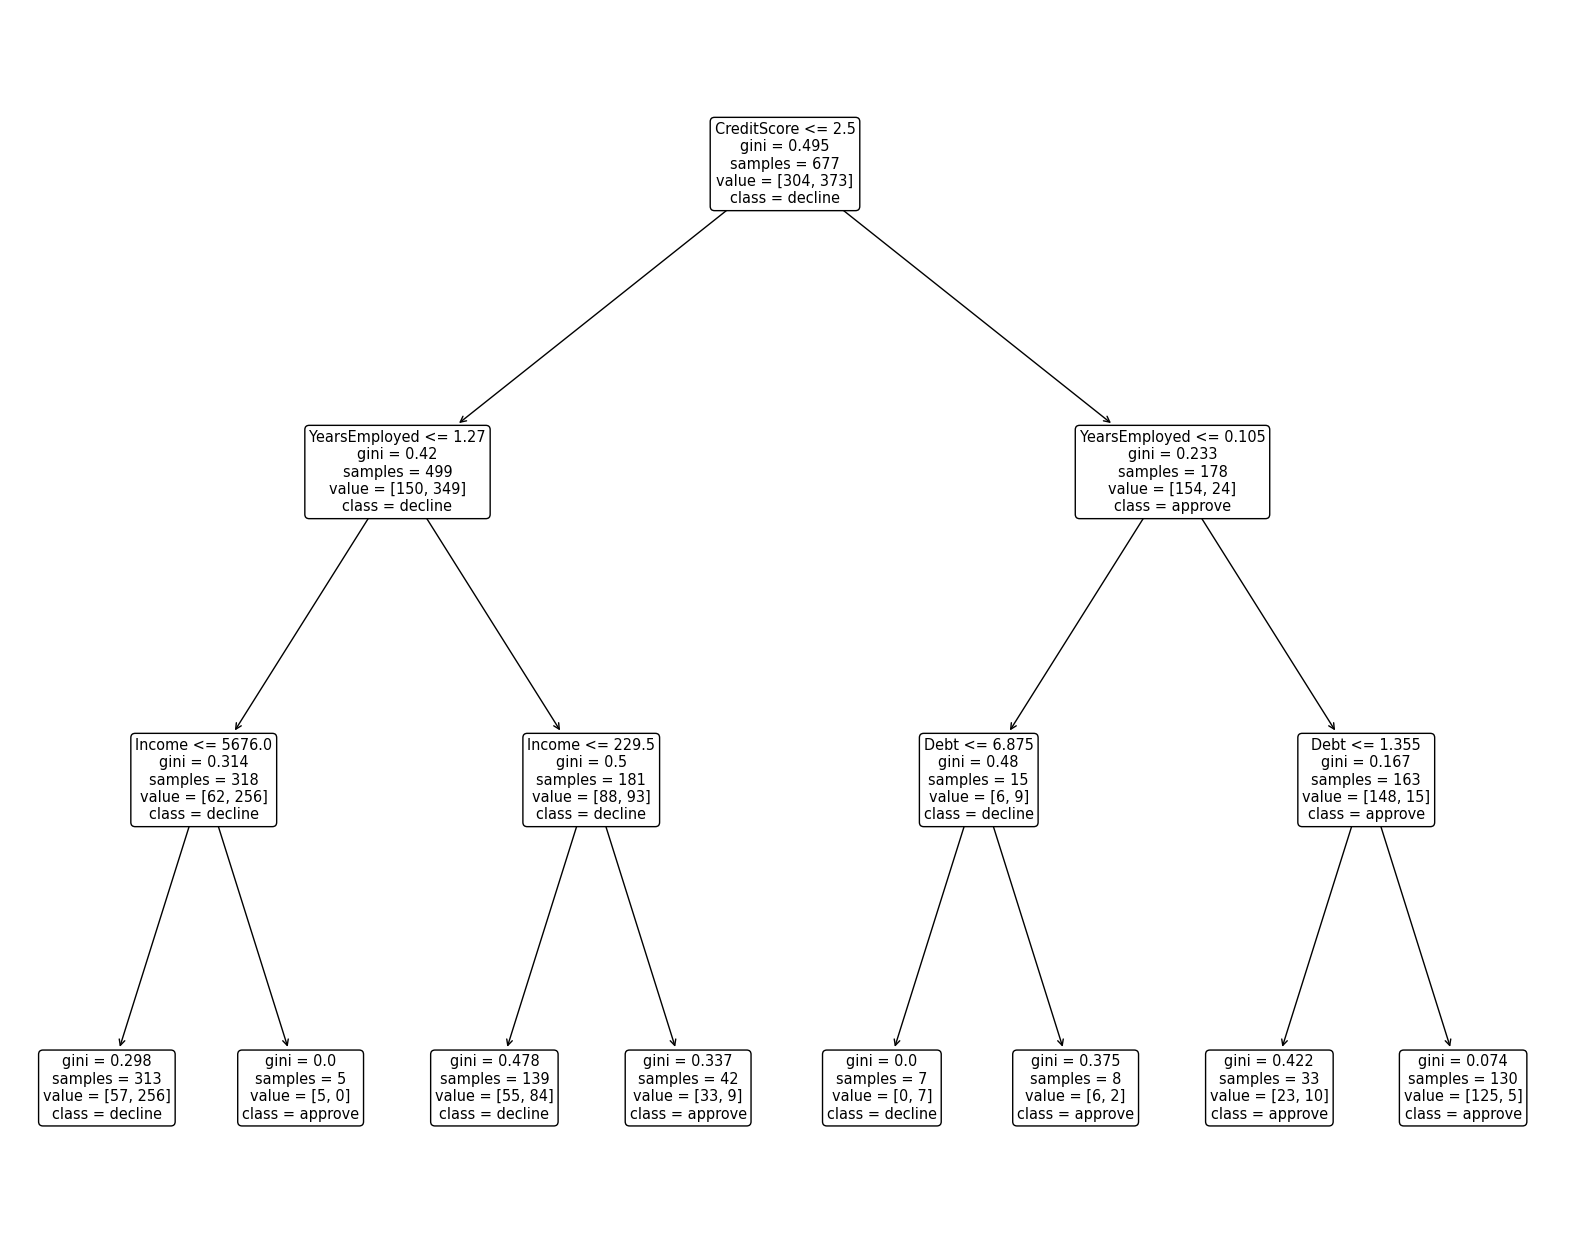

In [164]:
plt.figure(figsize=(20, 16))
plot_tree(classifier, feature_names = column_names[:-1], class_names = approval_class, rounded = True)
#нет слева, да справа

### 2. Применить метод градиентного бустинга. Вычислить значимость переменных. Выдать список построенных деревьев.

In [165]:
gbc = GradientBoostingClassifier()
gbc.fit(X, y)
y_pred = gbc.predict(X)

conf_matrix_output = pd.DataFrame(data=confusion_matrix(y, y_pred), columns=approval_class)
conf_matrix_output.index = approval_class

class_report_output = classification_report(y, y_pred, zero_division=0)
print(class_report_output)

conf_matrix_output

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       304
           1       0.92      0.98      0.95       373

    accuracy                           0.94       677
   macro avg       0.95      0.94      0.94       677
weighted avg       0.94      0.94      0.94       677



,approve,decline
approve,271,33
decline,7,366


[Text(0.5, 0.875, 'CreditScore <= 2.5\nfriedman_mse = 0.247\nsamples = 677\nvalue = -0.0'),
 Text(0.25, 0.625, 'YearsEmployed <= 1.27\nfriedman_mse = 0.21\nsamples = 499\nvalue = 0.148'),
 Text(0.125, 0.375, 'Income <= 5676.0\nfriedman_mse = 0.157\nsamples = 318\nvalue = 0.254'),
 Text(0.0625, 0.125, 'friedman_mse = 0.149\nsamples = 313\nvalue = 1.079'),
 Text(0.1875, 0.125, 'friedman_mse = -0.0\nsamples = 5\nvalue = -2.227'),
 Text(0.375, 0.375, 'Income <= 229.5\nfriedman_mse = 0.25\nsamples = 181\nvalue = -0.037'),
 Text(0.3125, 0.125, 'friedman_mse = 0.239\nsamples = 139\nvalue = 0.216'),
 Text(0.4375, 0.125, 'friedman_mse = 0.168\nsamples = 42\nvalue = -1.361'),
 Text(0.75, 0.625, 'YearsEmployed <= 0.105\nfriedman_mse = 0.117\nsamples = 178\nvalue = -0.416'),
 Text(0.625, 0.375, 'Debt <= 6.875\nfriedman_mse = 0.24\nsamples = 15\nvalue = 0.049'),
 Text(0.5625, 0.125, 'friedman_mse = 0.0\nsamples = 7\nvalue = 1.815'),
 Text(0.6875, 0.125, 'friedman_mse = 0.188\nsamples = 8\nvalue = -

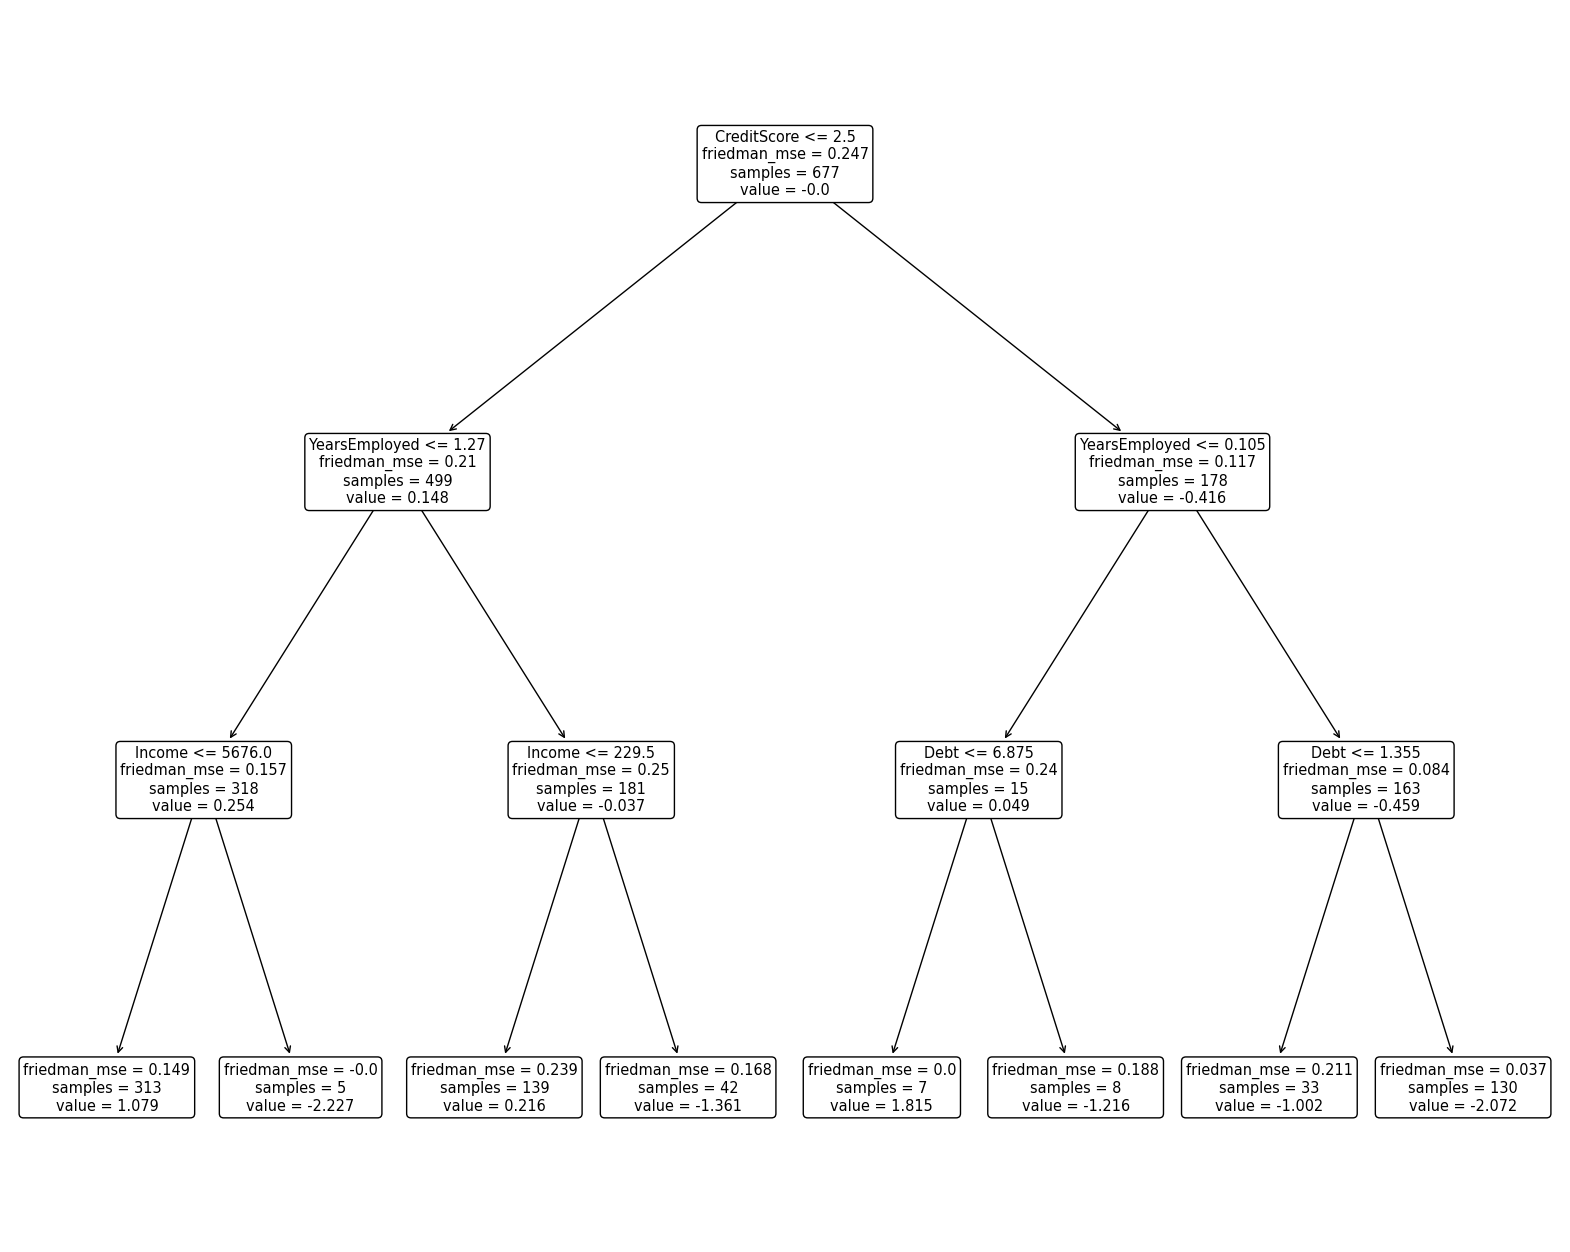

In [166]:
sub_tree_00 = gbc.estimators_[0, 0]
plt.figure(figsize=(20, 16))
plot_tree(sub_tree_00, feature_names = column_names[:-1], class_names = approval_class, rounded = True)

[Text(0.5, 0.875, 'CreditScore <= 2.5\nfriedman_mse = 0.228\nsamples = 677\nvalue = 0.0'),
 Text(0.25, 0.625, 'YearsEmployed <= 1.27\nfriedman_mse = 0.203\nsamples = 499\nvalue = 0.134'),
 Text(0.125, 0.375, 'Income <= 5676.0\nfriedman_mse = 0.155\nsamples = 318\nvalue = 0.229'),
 Text(0.0625, 0.125, 'friedman_mse = 0.149\nsamples = 313\nvalue = 0.985'),
 Text(0.1875, 0.125, 'friedman_mse = -0.0\nsamples = 5\nvalue = -1.982'),
 Text(0.375, 0.375, 'Income <= 229.5\nfriedman_mse = 0.245\nsamples = 181\nvalue = -0.033'),
 Text(0.3125, 0.125, 'friedman_mse = 0.239\nsamples = 139\nvalue = 0.195'),
 Text(0.4375, 0.125, 'friedman_mse = 0.168\nsamples = 42\nvalue = -1.213'),
 Text(0.75, 0.625, 'YearsEmployed <= 0.105\nfriedman_mse = 0.109\nsamples = 178\nvalue = -0.374'),
 Text(0.625, 0.375, 'Debt <= 6.875\nfriedman_mse = 0.214\nsamples = 15\nvalue = 0.044'),
 Text(0.5625, 0.125, 'friedman_mse = -0.0\nsamples = 7\nvalue = 1.68'),
 Text(0.6875, 0.125, 'friedman_mse = 0.187\nsamples = 8\nvalue =

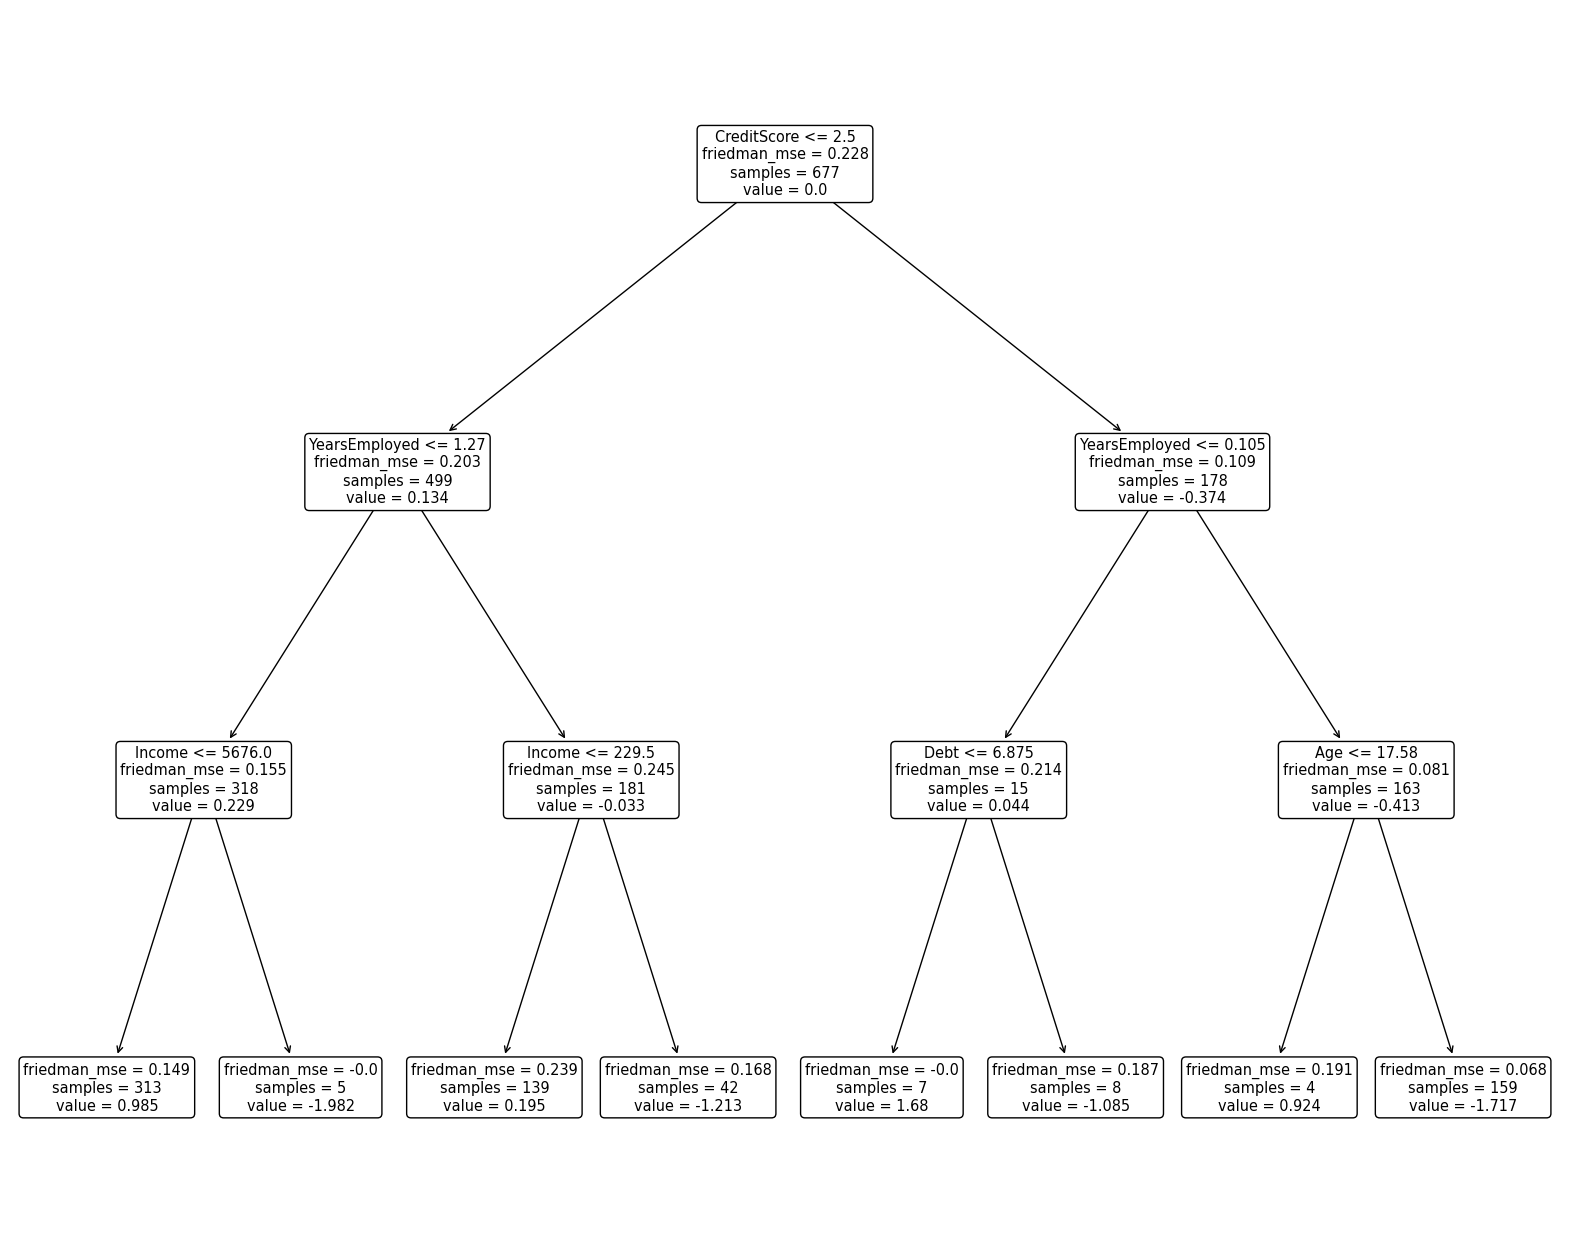

In [167]:
sub_tree_00 = gbc.estimators_[1, 0]
plt.figure(figsize=(20, 16))
plot_tree(sub_tree_00, feature_names = column_names[:-1], class_names = approval_class, rounded = True)

[Text(0.5, 0.875, 'CreditScore <= 2.5\nfriedman_mse = 0.213\nsamples = 677\nvalue = 0.0'),
 Text(0.25, 0.625, 'YearsEmployed <= 1.27\nfriedman_mse = 0.198\nsamples = 499\nvalue = 0.12'),
 Text(0.125, 0.375, 'Income <= 1063.5\nfriedman_mse = 0.153\nsamples = 318\nvalue = 0.206'),
 Text(0.0625, 0.125, 'friedman_mse = 0.14\nsamples = 296\nvalue = 0.958'),
 Text(0.1875, 0.125, 'friedman_mse = 0.22\nsamples = 22\nvalue = -0.462'),
 Text(0.375, 0.375, 'Income <= 229.5\nfriedman_mse = 0.24\nsamples = 181\nvalue = -0.03'),
 Text(0.3125, 0.125, 'friedman_mse = 0.239\nsamples = 139\nvalue = 0.176'),
 Text(0.4375, 0.125, 'friedman_mse = 0.168\nsamples = 42\nvalue = -1.091'),
 Text(0.75, 0.625, 'Debt <= 1.418\nfriedman_mse = 0.102\nsamples = 178\nvalue = -0.337'),
 Text(0.625, 0.375, 'Age <= 24.915\nfriedman_mse = 0.215\nsamples = 38\nvalue = -0.114'),
 Text(0.5625, 0.125, 'friedman_mse = 0.136\nsamples = 12\nvalue = 1.209'),
 Text(0.6875, 0.125, 'friedman_mse = 0.138\nsamples = 26\nvalue = -1.218

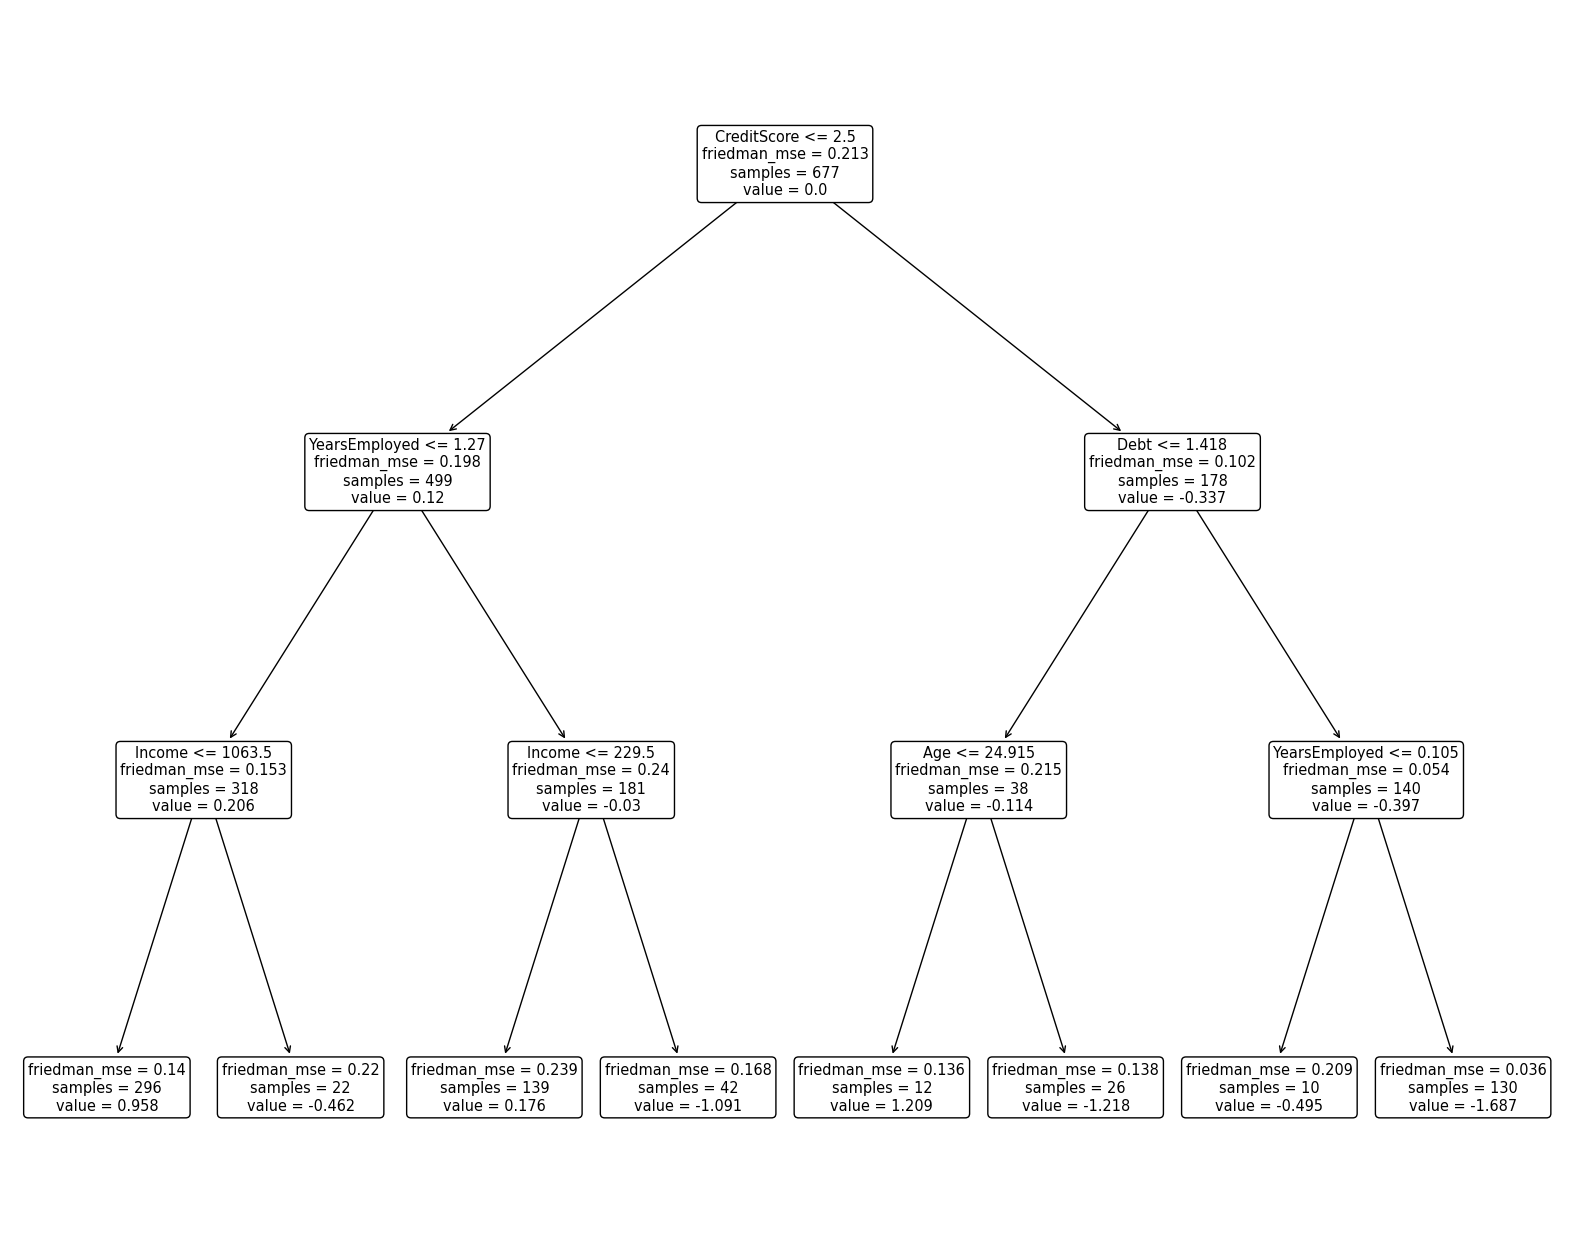

In [168]:
sub_tree_00 = gbc.estimators_[2, 0]
plt.figure(figsize=(20, 16))
plot_tree(sub_tree_00, feature_names = column_names[:-1], class_names = approval_class, rounded = True)

In [169]:
#значимость переменных
importance = gbc.feature_importances_
importance_out = pd.DataFrame()
importance_out['feature_name'] = column_names[:-1]
importance_out['importance'] = importance
importance_out.sort_values('importance', ascending=False).head(5)

,feature_name,importance
9,CreditScore,0.319265
13,Income,0.163129
7,YearsEmployed,0.140737
2,Debt,0.096382
1,Age,0.082645


### 3. Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева. 

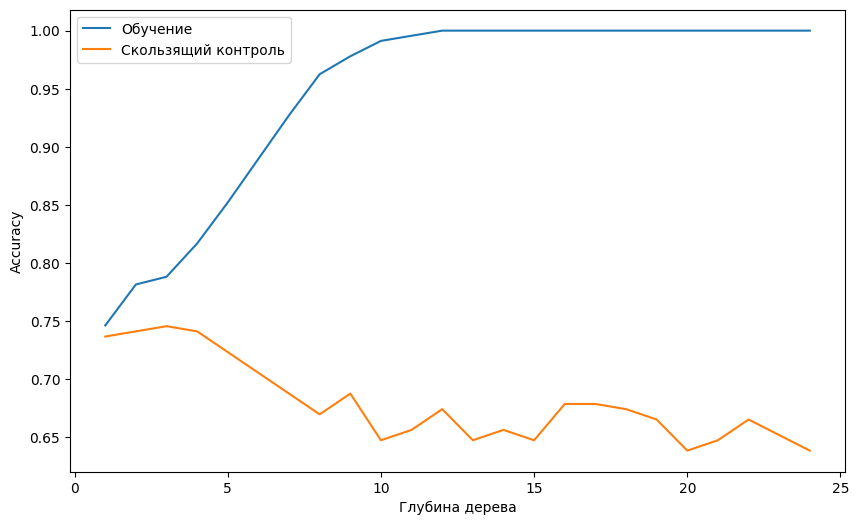

In [170]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

train_scores = []
test_scores = []

max_depth_values = range(1,25)
for max_depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    
plt.figure(figsize=(10,6))
plt.plot(max_depth_values, train_scores, label='Обучение')
plt.plot(max_depth_values, test_scores, label='Скользящий контроль')
plt.xlabel('Глубина дерева')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 4. Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев. Для разной глубины дерева нужно построить несколько зависимостей качества от числа деревьев, чтобы найти оптимальную комбинацию этих параметров

In [171]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

train_scores = []
test_scores = []

max_depth_values = range(1,45,3)
max_tree_values = range(1,45,3)
for max_depth in max_depth_values:
    train_scores_temp = []
    test_scores_temp = []
    for max_tree in max_tree_values:
        gbc = GradientBoostingClassifier(n_estimators=max_tree, max_depth=max_depth)
        gbc.fit(X_train, y_train)

        y_train_pred = gbc.predict(X_train)
        y_test_pred = gbc.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_scores_temp.append(train_accuracy)
        test_scores_temp.append(test_accuracy)
    train_scores.append(np.array(train_scores_temp))
    test_scores.append(np.array(test_scores_temp))
    
train_scores = np.array(train_scores)    
test_scores = np.array(test_scores)

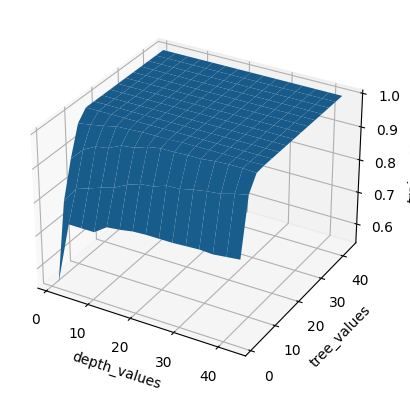

Максимум: depth - 7 trees - 37 value - 1.0


In [172]:
ax = plt.figure().add_subplot(projection='3d')
x_3d, y_3d = np.meshgrid(list(max_depth_values), list(max_tree_values))
surf = ax.plot_surface(x_3d, y_3d, train_scores, linewidth=0)
ax.set_xlabel('depth_values')
ax.set_ylabel('tree_values')
ax.set_zlabel('train_scores')
plt.show()

i,j = np.unravel_index(train_scores.argmax(), train_scores.shape)
print('Максимум: depth -', list(max_depth_values)[i], 'trees -', list(max_tree_values)[j], 'value -',train_scores.max())

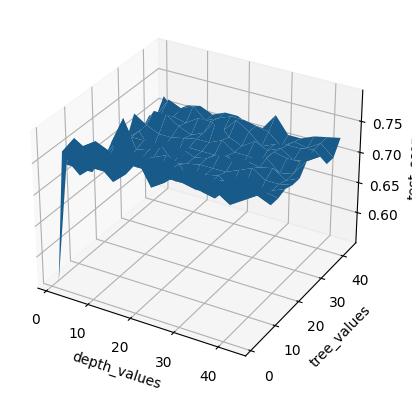

Максимум: depth - 7 trees - 37 value - 0.7946428571428571


In [173]:
ax = plt.figure().add_subplot(projection='3d')
x_3d, y_3d = np.meshgrid(list(max_depth_values), list(max_tree_values))
surf = ax.plot_surface(x_3d, y_3d, test_scores, linewidth=0)
ax.set_xlabel('depth_values')
ax.set_ylabel('tree_values')
ax.set_zlabel('test_scores')
plt.show()

i,j = np.unravel_index(train_scores.argmax(), test_scores.shape)
print('Максимум: depth -', list(max_depth_values)[i], 'trees -', list(max_tree_values)[j], 'value -',test_scores.max())

### 5. Выполнить предыдущий пункт для случайного леса

In [174]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

train_scores = []
test_scores = []

max_depth_values = range(1,35,3)
max_tree_values = range(1,35,3)
for max_depth in max_depth_values:
    train_scores_temp = []
    test_scores_temp = []
    for max_tree in max_tree_values:
        rfc = RandomForestClassifier(n_estimators=max_tree, max_depth=max_depth)
        rfc.fit(X_train, y_train)

        y_train_pred = rfc.predict(X_train)
        y_test_pred = rfc.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_scores_temp.append(train_accuracy)
        test_scores_temp.append(test_accuracy)
    train_scores.append(np.array(train_scores_temp))
    test_scores.append(np.array(test_scores_temp))
    
train_scores = np.array(train_scores)    
test_scores = np.array(test_scores)

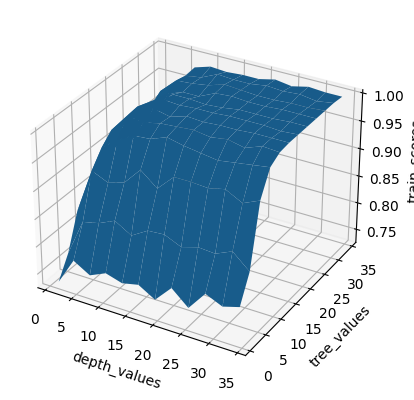

Максимум: depth - 13 trees - 31 value - 1.0


In [175]:
ax = plt.figure().add_subplot(projection='3d')
x_3d, y_3d = np.meshgrid(list(max_depth_values), list(max_tree_values))
surf = ax.plot_surface(x_3d, y_3d, train_scores, linewidth=0)
ax.set_xlabel('depth_values')
ax.set_ylabel('tree_values')
ax.set_zlabel('train_scores')
plt.show()

i,j = np.unravel_index(train_scores.argmax(), train_scores.shape)
print('Максимум: depth -', list(max_depth_values)[i], 'trees -', list(max_tree_values)[j], 'value -',train_scores.max())

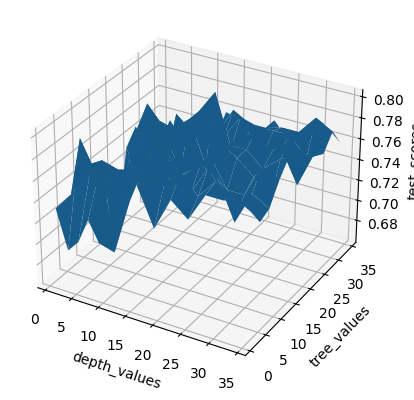

Максимум: depth - 13 trees - 31 value - 0.8035714285714286


In [176]:
ax = plt.figure().add_subplot(projection='3d')
x_3d, y_3d = np.meshgrid(list(max_depth_values), list(max_tree_values))
surf = ax.plot_surface(x_3d, y_3d, test_scores, linewidth=0)
ax.set_xlabel('depth_values')
ax.set_ylabel('tree_values')
ax.set_zlabel('test_scores')
plt.show()

i,j = np.unravel_index(train_scores.argmax(), test_scores.shape)
print('Максимум: depth -', list(max_depth_values)[i], 'trees -', list(max_tree_values)[j], 'value -',test_scores.max())